# GMM estimator experiments
A toy example to check whether the GMM estimator actually works.

In [6]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

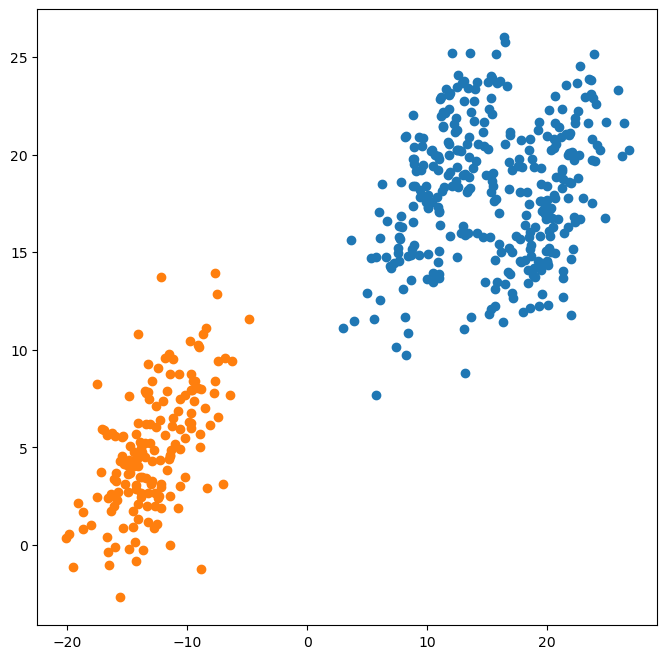

In [7]:
# generate 3 clusters
X,Y,centers = make_blobs(cluster_std=1.5,random_state=20,n_samples=500,centers=3,return_centers=True)

# split them in two classes
y = Y == 2

X = np.dot(X, np.random.RandomState(0).randn(2,2))

X0 = X[y == 0]
X1 = X[y == 1]

plt.figure(figsize=(8,8))
plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

In [8]:
# import the GMM classifier
from gmm import GMM
from preprocessing import split_dataset

gmm_model = GMM(n_components=2, covariance_type='tied')

X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=0.2, stratify=True)

gmm_model = gmm_model.fit(X_tr, y_tr)

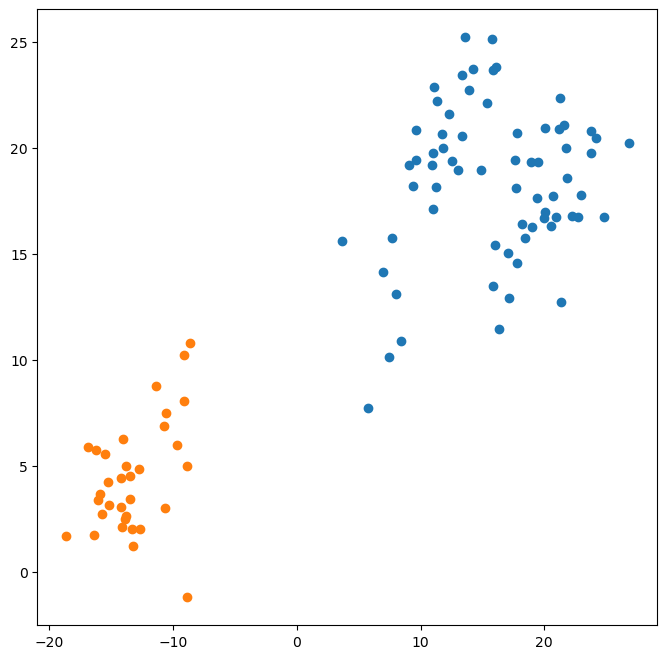

In [9]:
# predict on the test samples
y_pred = gmm_model.predict(X_te)

X0 = X_te[y_pred == 0]
X1 = X_te[y_pred == 1]

plt.figure(figsize=(8,8))
plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

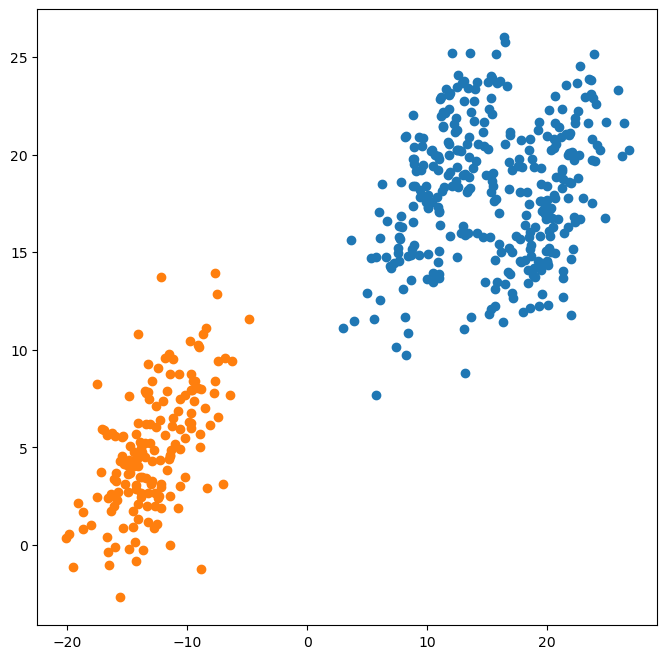

In [10]:
# predict on the whole dataset

y_pred = gmm_model.predict(X)

X0 = X[y_pred == 0]
X1 = X[y_pred == 1]

plt.figure(figsize=(8,8))
plt.scatter(X0[:, 0], X0[:, 1])
plt.scatter(X1[:, 0], X1[:, 1])
plt.show()